In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Fire AI/project1_df.csv')

In [4]:
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [5]:
#checking the null values if available
df.isnull().sum()

,0
CID,0
TID,0
Gender,0
Age Group,0
Purchase Date,0
Product Category,0
Discount Availed,0
Discount Name,27585
Discount Amount (INR),0
Gross Amount,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          27415 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB


In [7]:
#converting date into timestamp
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d/%m/%Y %H:%M:%S')
df['Purchase Timestamp'] = df['Purchase Date'].apply(lambda x: x.timestamp())
df[['Purchase Date', 'Purchase Timestamp']].head()


,Purchase Date,Purchase Timestamp
0,2023-08-30 20:27:08,1.693427e+09
1,2024-02-23 09:33:46,1.708681e+09
2,2022-03-06 09:09:50,1.646558e+09
3,2020-11-04 04:41:57,1.604465e+09
4,2022-05-31 17:00:32,1.654016e+09


In [8]:
df['Purchase Timestamp'].head()

,Purchase Timestamp
0,1.693427e+09
1,1.708681e+09
2,1.646558e+09
3,1.604465e+09
4,1.654016e+09


In [9]:
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location,Purchase Timestamp
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad,1.693427e+09
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore,1.708681e+09
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi,1.646558e+09
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi,1.604465e+09
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi,1.654016e+09


In [10]:
df.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Purchase Timestamp'],
      dtype='object')

In [11]:
df = df[['Gender', 'Age Group',
       'Product Category', 'Discount Availed',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Purchase Timestamp']]

In [12]:
df.head()

,Gender,Age Group,Product Category,Discount Availed,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Purchase Timestamp
0,Female,25-45,Electronics,Yes,64.30,725.304000,661.004000,Credit Card,1.693427e+09
1,Male,25-45,Electronics,Yes,175.19,4638.991875,4463.801875,Credit Card,1.708681e+09
2,Other,60 and above,Clothing,Yes,211.54,1986.372575,1774.832575,Credit Card,1.646558e+09
3,Other,60 and above,Sports & Fitness,No,0.00,5695.612650,5695.612650,Debit Card,1.604465e+09
4,Male,18-25,Sports & Fitness,Yes,439.92,2292.651500,1852.731500,Credit Card,1.654016e+09


In [22]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns


In [23]:
df[numerical_columns].mean()

,0
Gender,9.999273e-01
Age Group,3.627212e+01
Product Category,3.055818e+00
Discount Availed,4.984545e-01
Discount Amount (INR),1.369868e+02
Gross Amount,3.012937e+03
Net Amount,2.875950e+03
Purchase Method,2.386073e+00
Purchase Timestamp,1.647700e+09


In [24]:
df[numerical_columns].median()

,0
Gender,1.000000e+00
Age Group,3.500000e+01
Product Category,3.000000e+00
Discount Availed,0.000000e+00
Discount Amount (INR),0.000000e+00
Gross Amount,2.954266e+03
Net Amount,2.814911e+03
Purchase Method,2.000000e+00
Purchase Timestamp,1.647498e+09


In [25]:
df[numerical_columns].std()

,0
Gender,8.191422e-01
Age Group,1.355660e+01
Product Category,2.143528e+00
Discount Availed,5.000022e-01
Discount Amount (INR),1.653755e+02
Gross Amount,1.718431e+03
Net Amount,1.726128e+03
Purchase Method,1.897979e+00
Purchase Timestamp,4.557419e+07


In [27]:
df[numerical_columns].mode().iloc[0]

,0
Gender,0.000000e+00
Age Group,3.500000e+01
Product Category,3.000000e+00
Discount Availed,0.000000e+00
Discount Amount (INR),0.000000e+00
Gross Amount,1.718398e+03
Net Amount,2.939300e+02
Purchase Method,1.000000e+00
Purchase Timestamp,1.579144e+09


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
encoder = OneHotEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Product Category'] = le.fit_transform(df['Product Category'])
df['Discount Availed'] = le.fit_transform(df['Discount Availed'])
df['Purchase Method'] = le.fit_transform(df['Purchase Method'])

In [15]:
def age_group_to_mean(age_group):
  if '-' in age_group:
    lower,upper = map(int, age_group.split('-'))
    return (lower+upper)/2
  elif '60 and above' in age_group:
    return 70
  else:
    return None
df['Age Group'] = df['Age Group'].apply(age_group_to_mean)

In [16]:
corr_matrix = df.corr()

In [17]:
corr_matrix

,Gender,Age Group,Product Category,Discount Availed,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Purchase Timestamp
Gender,1.000000,-0.004546,0.004693,0.002397,0.001978,0.011317,0.011077,-0.001970,0.000577
Age Group,-0.004546,1.000000,0.003504,0.005563,0.006931,0.002919,0.002242,-0.003043,-0.002630
Product Category,0.004693,0.003504,1.000000,0.002354,0.000136,0.003443,0.003415,-0.000135,0.006174
Discount Availed,0.002397,0.005563,0.002354,1.000000,0.830910,-0.000258,-0.079864,0.003924,-0.008010
Discount Amount (INR),0.001978,0.006931,0.000136,0.830910,1.000000,0.001473,-0.094341,-0.000525,-0.005900
Gross Amount,0.011317,0.002919,0.003443,-0.000258,0.001473,1.000000,0.995400,0.004908,0.088803
Net Amount,0.011077,0.002242,0.003415,-0.079864,-0.094341,0.995400,1.000000,0.004937,0.088972
Purchase Method,-0.001970,-0.003043,-0.000135,0.003924,-0.000525,0.004908,0.004937,1.000000,-0.003410
Purchase Timestamp,0.000577,-0.002630,0.006174,-0.008010,-0.005900,0.088803,0.088972,-0.003410,1.000000


In [18]:
df.head()

,Gender,Age Group,Product Category,Discount Availed,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Purchase Timestamp
0,0,35.0,3,1,64.30,725.304000,661.004000,1,1.693427e+09
1,1,35.0,3,1,175.19,4638.991875,4463.801875,1,1.708681e+09
2,2,70.0,2,1,211.54,1986.372575,1774.832575,1,1.646558e+09
3,2,70.0,7,0,0.00,5695.612650,5695.612650,2,1.604465e+09
4,1,21.5,7,1,439.92,2292.651500,1852.731500,1,1.654016e+09


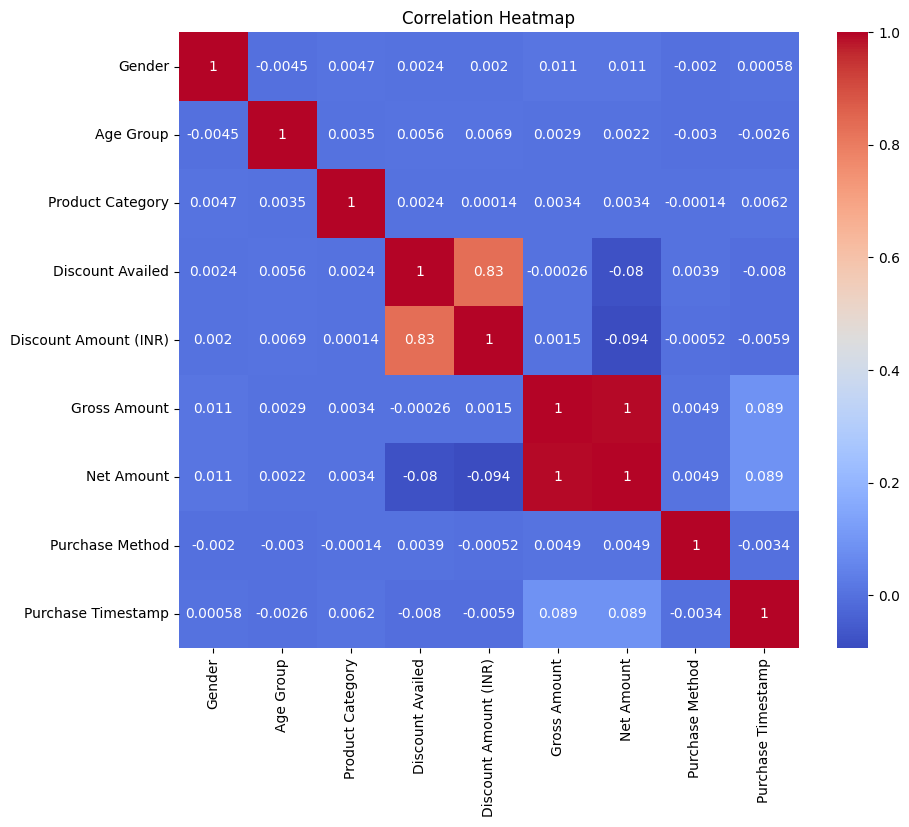

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

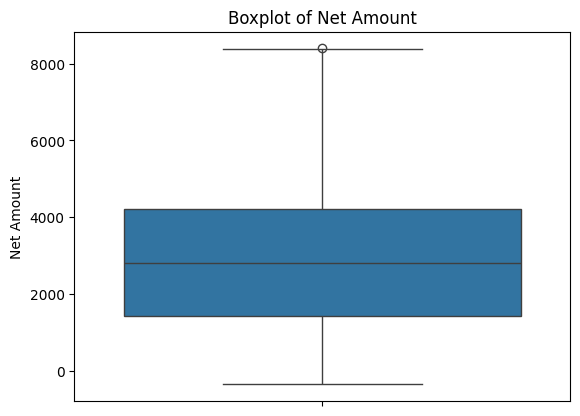

In [29]:
sns.boxplot(df['Net Amount'])
plt.title('Boxplot of Net Amount')
plt.show()

In [59]:
mean_value = df['Net Amount'].mean()
std_dev = df['Net Amount'].std()
df['Z-Score'] = (df['Net Amount'] - mean_value) / std_dev
df[['Net Amount', 'Z-Score']]
for z_score in df['Z-Score']:
    if z_score > 1.96 or z_score < -1.96:
        print(z_score)
    else:
        pass

2.8666565435057128
2.246651863889652
2.1163931409489187
2.4130651524390014
1.9747299320538754
1.9954138005682585
1.9914740574701417
2.556636794789499
2.61052341962884
2.4159710207436635
2.217841076743597
2.3972074619781703
2.353229315652176
2.9926849307245487
2.061984190930949
2.27635493723815
2.424893824834961
2.06260921708123
2.262235878203208
2.586089654911901
2.116731702211552
2.4550820882201765
2.093456020937469
2.4982756460485906
2.3133944315405954
2.053253666927036
2.6443408465555343
2.3629205448953536
2.9267630439166012
2.0809103100836674
2.209246203183977
2.417985877374931
2.2937639612874157
1.9648414404733843
2.4494652386894815
2.8728311732959257
2.152276927067196
2.395356961661428
2.840568266280294
2.246963544175923
2.0617319500449973
2.5096833762586677
2.2516007443309944
2.6602075166528665
2.5430505468312914
2.8246839845087934
1.9680640292473839
2.4314450779599435
2.3956065376230002
2.203160413861978
2.67748161442207
2.2789957035000645
2.19330285857756
2.1427466940165
1.969

In [41]:
from scipy import stats

# Calculate Z-scores for each column
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))  # Only numerical columns

# Identify rows with Z-scores greater than 3 or less than -3
outliers = (z_scores > 3) | (z_scores < -3)
outlier_indices = outliers.any(axis=1)
df_outliers = df[outlier_indices]
df_outliers # Show the outliers


,0
Gender,2.500000e+01
Age Group,8.435000e+02
Product Category,1.040000e+02
Discount Availed,1.400000e+01
Discount Amount (INR),3.474830e+03
Gross Amount,2.386574e+05
Net Amount,2.351825e+05
Purchase Method,6.500000e+01
Purchase Timestamp,4.937697e+10


In [44]:
outlier_count = df_outliers.any(axis=1).sum()

In [45]:
outlier_count

29